# Wind Profile in Illinois

This notebook calculates an average hourly capacity factor for wind turbines in Illinois.

We use a reference wind farm, Railsplitter Wind Farm, located in Lincoln, IL. The data was provided
by the University of Illinois F\&S Department. UIUC has a 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
railsplitter_df = pd.read_csv("railsplitter_data.csv", parse_dates=True, index_col='time')
railsplitter_df

,MWh,kw
time,,
2016-11-01 01:00:00,7.3,7300
2016-11-01 02:00:00,7.6,7600
2016-11-01 03:00:00,6.5,6500
2016-11-01 04:00:00,7.4,7400
2016-11-01 05:00:00,7.9,7900
...,...,...
2019-06-30 19:00:00,2.1,2100
2019-06-30 20:00:00,1.4,1400
2019-06-30 21:00:00,2.2,2200


In [4]:
hours_grouped = railsplitter_df.groupby(railsplitter_df.index.hour)

In [12]:
avg_hourly = np.zeros(len(hours_grouped))
std_hourly = np.zeros(len(hours_grouped))
for i, hour in enumerate(hours_grouped.groups):
    hour_data = hours_grouped.get_group(hour)
    avg_hourly[i] = hour_data.kw.mean()
    std_hourly[i] = hour_data.kw.std()

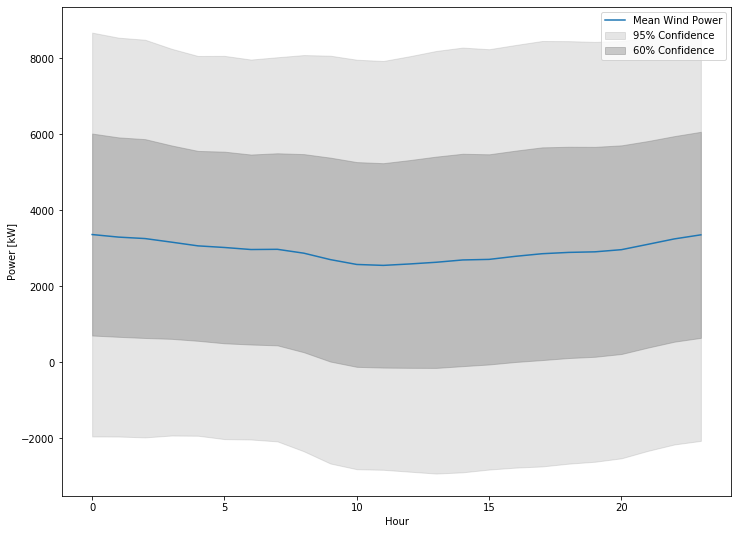

In [17]:
plt.figure(figsize=(12,9))
plt.plot(range(24), avg_hourly, label='Mean Wind Power')
plt.fill_between(range(24),
                 avg_hourly + 2 * std_hourly,
                 avg_hourly - 2 * std_hourly,
                 color='gray', alpha=0.2, label='95% Confidence')
plt.fill_between(range(24),
                 avg_hourly + std_hourly,
                 avg_hourly - std_hourly,
                 color='gray', alpha=0.4
                 , label='60% Confidence')
plt.legend()
plt.xlabel('Hour')
plt.ylabel('Power [kW]')
plt.show()

As expected, the uncertainty is huge. Wind can take on any value at any time and is difficult to predict. So let's just use the average value to generate our "profile."

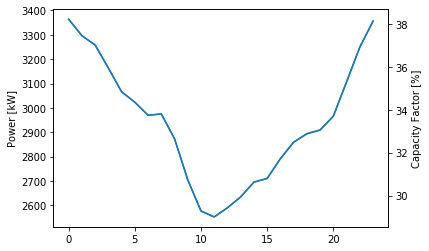

In [32]:
fig, ax = plt.subplots()
fig.figsize=(12,9)
ax.plot(range(24), avg_hourly, label='Mean Wind Power')
ax2 = ax.twinx()
ax2.plot(range(24), avg_hourly/railsplitter_df.kw.max()*100)
plt.xlabel('Hour')
ax.set_ylabel('Power [kW]')
ax2.set_ylabel('Capacity Factor [%]')
plt.show()

In [31]:
avg_hourly.mean()/railsplitter_df.kw.max()

0.33419726781705955